# Travel Planner Based on Currency Conversion Risk

**Project Goal:** Create a travel planning tool that will allow the user to select a set of countries they would like to travel to and a travel timeframe (3,6,12 months). The tool will analyze historical Forex data and predict the country that will have the most favorable currency within the given travel timeframe.

**The tool will:** Check Forex volatility as barometer for travel decisions Use historical forex data (up to 2 years) 3 - 6 - 12 months predictive outlook using Monte Carlo and other algorithms Produce graphs, risk graphs, value graphs, Variables - currency / country, traveling times (3-6-12 months)


### Import Library

In [1]:
import os
import requests
import pandas as pd
import pandas_datareader as pdr

from pandas_datareader import data as wb
import seaborn as sns

from dotenv import load_dotenv
import numpy as np
%matplotlib inline
import json
from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo

from yahoofinancials import YahooFinancials

import plotly.express as px
from pathlib import Path
#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
load_dotenv()

# Set up API credentials

# Set Alpha Vantage API key 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")

# Verify that Alpha Vantage key was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")


# Set the Mapbox API key
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)
# Verify that Mapbox API key was correctly loaded
print(f"Mapbox Key type: {type(map_box_api)}")

Alpha Vantage Key type: <class 'str'>
Mapbox Key type: <class 'str'>


In [3]:
# put all inputs required for the project up here to be called at once.

### Country 1

In [4]:
# Get user input for first country and return basic country data

name = (input("What Country are you interested in traveling to? "))
country_name = CountryInfo(name).name()
country_border= CountryInfo(name).borders()
country_capital= CountryInfo(name).capital()
country_currency = CountryInfo(name).currencies()
country_timezone = CountryInfo(name).timezones()
country_wiki = CountryInfo(name).wiki()
country_info = print(f"Country name: {country_name}", '\n'
                      f"Country Capital: {country_capital}", '\n'
                      f"Country Border: {country_border}", '\n' 
                      f"Country Currency: {country_currency}", '\n' 
                      f"Country Timezone: {country_timezone}", '\n'
                      f"Country Wiki: {country_wiki}")

country_info




What Country are you interested in traveling to?  Brazil


Country name: brazil 
Country Capital: Brasília 
Country Border: ['ARG', 'BOL', 'COL', 'GUF', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN'] 
Country Currency: ['BRL'] 
Country Timezone: ['UTC−05:00', 'UTC−04:00', 'UTC−03:00', 'UTC−02:00'] 
Country Wiki: http://en.wikipedia.org/wiki/brazil


### Country 2

In [5]:
# Get user input for the second country and return basic country data

name_2 = (input("What Country are you interested in traveling to? "))
country_name_2 = CountryInfo(name_2).name()
country_border_2= CountryInfo(name_2).borders()
country_capital_2= CountryInfo(name_2).capital()
country_currency_2 = CountryInfo(name_2).currencies()
country_timezone_2 = CountryInfo(name_2).timezones()
country_wiki_2 = CountryInfo(name_2).wiki()
country_info_2 = print(f"Country name: {country_name_2}", '\n'
                      f"Country Capital: {country_capital_2}", '\n'
                      f"Country Border: {country_border_2}", '\n' 
                      f"Country Currency: {country_currency_2}", '\n' 
                      f"Country Timezone: {country_timezone_2}", '\n'
                      f"Country Wiki: {country_wiki_2}")

country_info_2

What Country are you interested in traveling to?  France


Country name: france 
Country Capital: Paris 
Country Border: ['AND', 'BEL', 'DEU', 'ITA', 'LUX', 'MCO', 'ESP', 'CHE'] 
Country Currency: ['EUR'] 
Country Timezone: ['UTC−10:00', 'UTC−09:30', 'UTC−09:00', 'UTC−08:00', 'UTC−04:00', 'UTC−03:00', 'UTC+01:00', 'UTC+03:00', 'UTC+04:00', 'UTC+05:00', 'UTC+11:00', 'UTC+12:00'] 
Country Wiki: http://en.wikipedia.org/wiki/france


### Country 3

In [6]:
# Get user input for the third country and return basic country data

name_3 = (input("What Country are you interested in traveling to? "))
country_name_3 = CountryInfo(name_3).name()
country_border_3= CountryInfo(name_3).borders()
country_capital_3= CountryInfo(name_3).capital()
country_currency_3 = CountryInfo(name_3).currencies()
country_timezone_3 = CountryInfo(name_3).timezones()
country_wiki_3 = CountryInfo(name_3).wiki()
country_info_3 = print(f"Country name: {country_name_3}", '\n'
                      f"Country Capital: {country_capital_3}", '\n'
                      f"Country Border: {country_border_3}", '\n' 
                      f"Country Currency: {country_currency_3}", '\n' 
                      f"Country Timezone: {country_timezone_3}", '\n'
                      f"Country Wiki: {country_wiki_3}")

country_info_3

What Country are you interested in traveling to?  Japan


Country name: japan 
Country Capital: Tokyo 
Country Border: [] 
Country Currency: ['JPY'] 
Country Timezone: ['UTC+09:00'] 
Country Wiki: http://en.wikipedia.org/wiki/japan


In [ ]:
#country Currency 1
pair = country_currency[0].strip("''")
forex_pair = pair + "USD"

#Country Currency 2
pair_2 = country_currency_2[0].strip("''")
forex_pair_2 = pair_2 + "USD"

#Country Currency 3
pair_3 = country_currency_3[0].strip("''")
forex_pair_3 = pair_3 + "USD"

print(f' We will now analyze the following pairs: \n {forex_pair} \n {forex_pair_2} \n {forex_pair_3}')

In [8]:
# Currency 1
time_series = pdr.av.time_series.AVTimeSeriesReader(forex_pair, api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
Forex = forex

# Currency 2
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_2, api_key='alpha_vantage_api_key')
forex_2 = time_series_2.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
Forex_2 = forex_2

# Currency 3
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_3, api_key='alpha_vantage_api_key')
forex_3 = time_series_3.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
Forex_3 = forex_3

In [9]:
# Currency 1
forex_close = Forex.drop(columns=['volume', 'open', 'high', 'low'])

# Currency 2
forex_2_close = Forex_2.drop(columns=['volume', 'open', 'high', 'low'])

# Currency 3
forex_3_close = Forex_3.drop(columns=['volume', 'open', 'high', 'low'])

# Concat all 3 countries currency
joined_forex = pd.concat([forex_close, forex_2_close, forex_3_close], axis="columns", join="inner", keys=[f'{forex_pair}',f'{forex_pair_2}',f'{forex_pair_3}'])

In [ ]:
### vvv NEED TO FIX vvv

# Re name columns 

joined_forex_renamed = joined_forex.rename(columns={"close": f"{forex_pair}", "close": f"{forex_pair_2}", "close": f"{forex_pair_3}"})
joined_forex_renamed

# joined_forex_renamed = joined_forex.columns[f"{forex_pair}", f"{forex_pair_2}", f"{forex_pair_3}"]
# joined_forex_renamed

### ^^^ NEED TO FIX ^^^

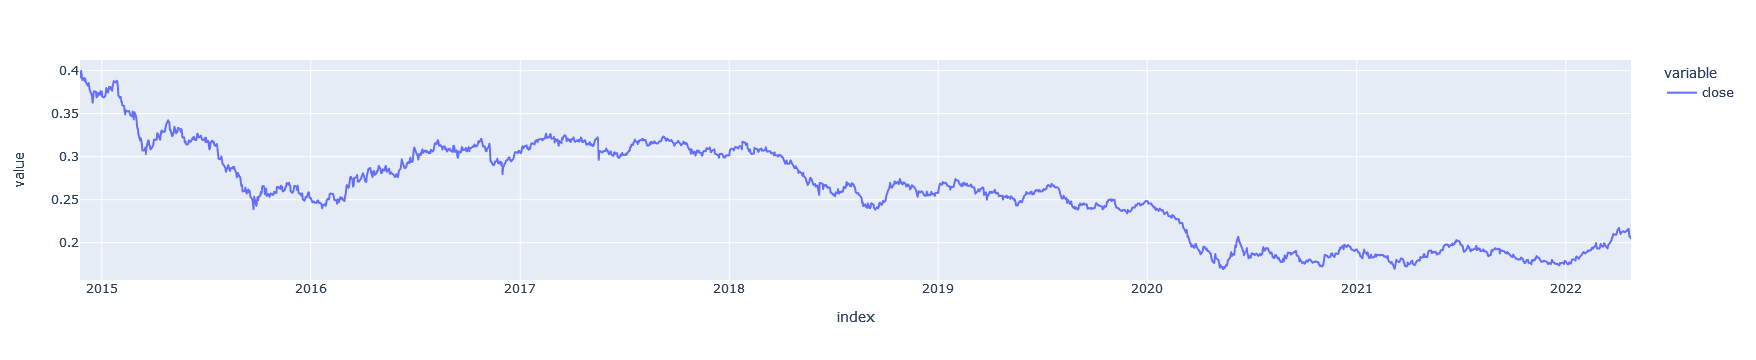

In [11]:
# Plot The Closing Value 
forex[['close']].plot()



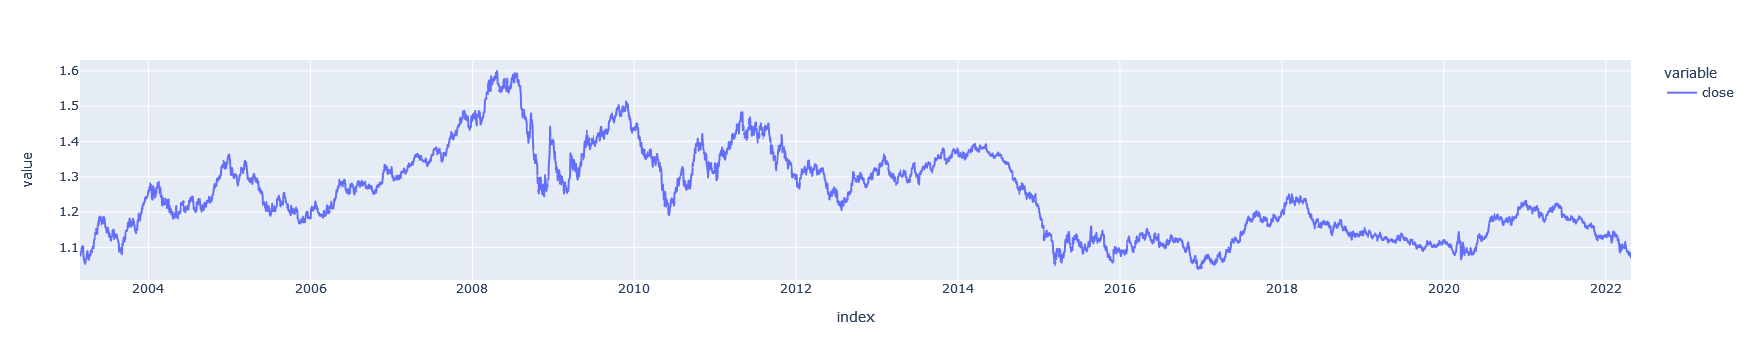

In [12]:
# Plot The Closing Value Of Country Currency 2
forex_2[['close']].plot()


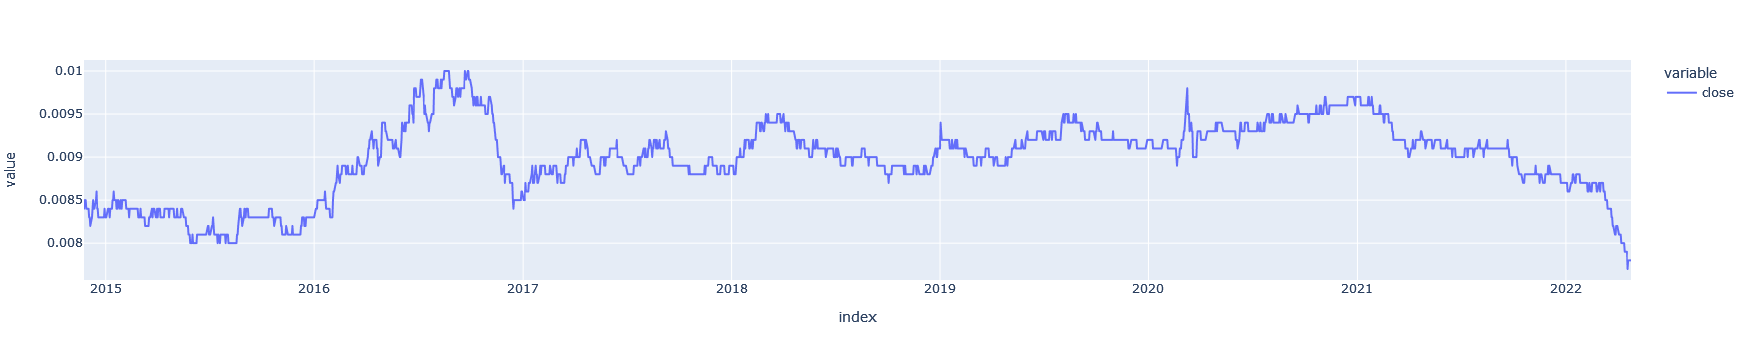

In [13]:
# Plot The Closing Value Of Country Currency 3
forex_3[['close']].plot()


In [14]:
forex_stats = forex.describe()
forex_stats

open         high          low        close  volume
count  1935.000000  1935.000000  1935.000000  1935.000000  1935.0
mean      0.258300     0.260060     0.256393     0.258216     0.0
std       0.054104     0.054283     0.053786     0.054029     0.0
min       0.169400     0.171200     0.166400     0.169400     0.0
25%       0.196850     0.198550     0.195100     0.197000     0.0
50%       0.260200     0.262500     0.258400     0.260500     0.0
75%       0.306200     0.307900     0.304050     0.306200     0.0
max       0.399500     0.399900     0.394700     0.399500     0.0

In [15]:
forex_stats_2 = forex_2.describe()
forex_stats_2

open         high          low        close  volume
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.0
mean      1.249070     1.254445     1.243637     1.249056     0.0
std       0.120283     0.121096     0.119436     0.120282     0.0
min       1.039000     1.041800     1.033900     1.039000     0.0
25%       1.140100     1.144500     1.135500     1.139950     0.0
50%       1.233400     1.238800     1.227800     1.233300     0.0
75%       1.335750     1.340650     1.329000     1.335850     0.0
max       1.599600     1.603500     1.586600     1.599600     0.0

In [16]:
forex_stats_3 = forex_3.describe()
forex_stats_3

open         high          low        close  volume
count  1936.000000  1936.000000  1936.000000  1936.000000  1936.0
mean      0.008983     0.009017     0.008953     0.008983     0.0
std       0.000430     0.000432     0.000430     0.000431     0.0
min       0.007700     0.007800     0.007700     0.007700     0.0
25%       0.008800     0.008800     0.008800     0.008800     0.0
50%       0.009000     0.009100     0.009000     0.009000     0.0
75%       0.009225     0.009300     0.009200     0.009225     0.0
max       0.010000     0.010000     0.010000     0.010000     0.0

# Plot the Candlestick charts

### Plot The First Countries Currency On A Candlestick Chart Verse The US Dollar

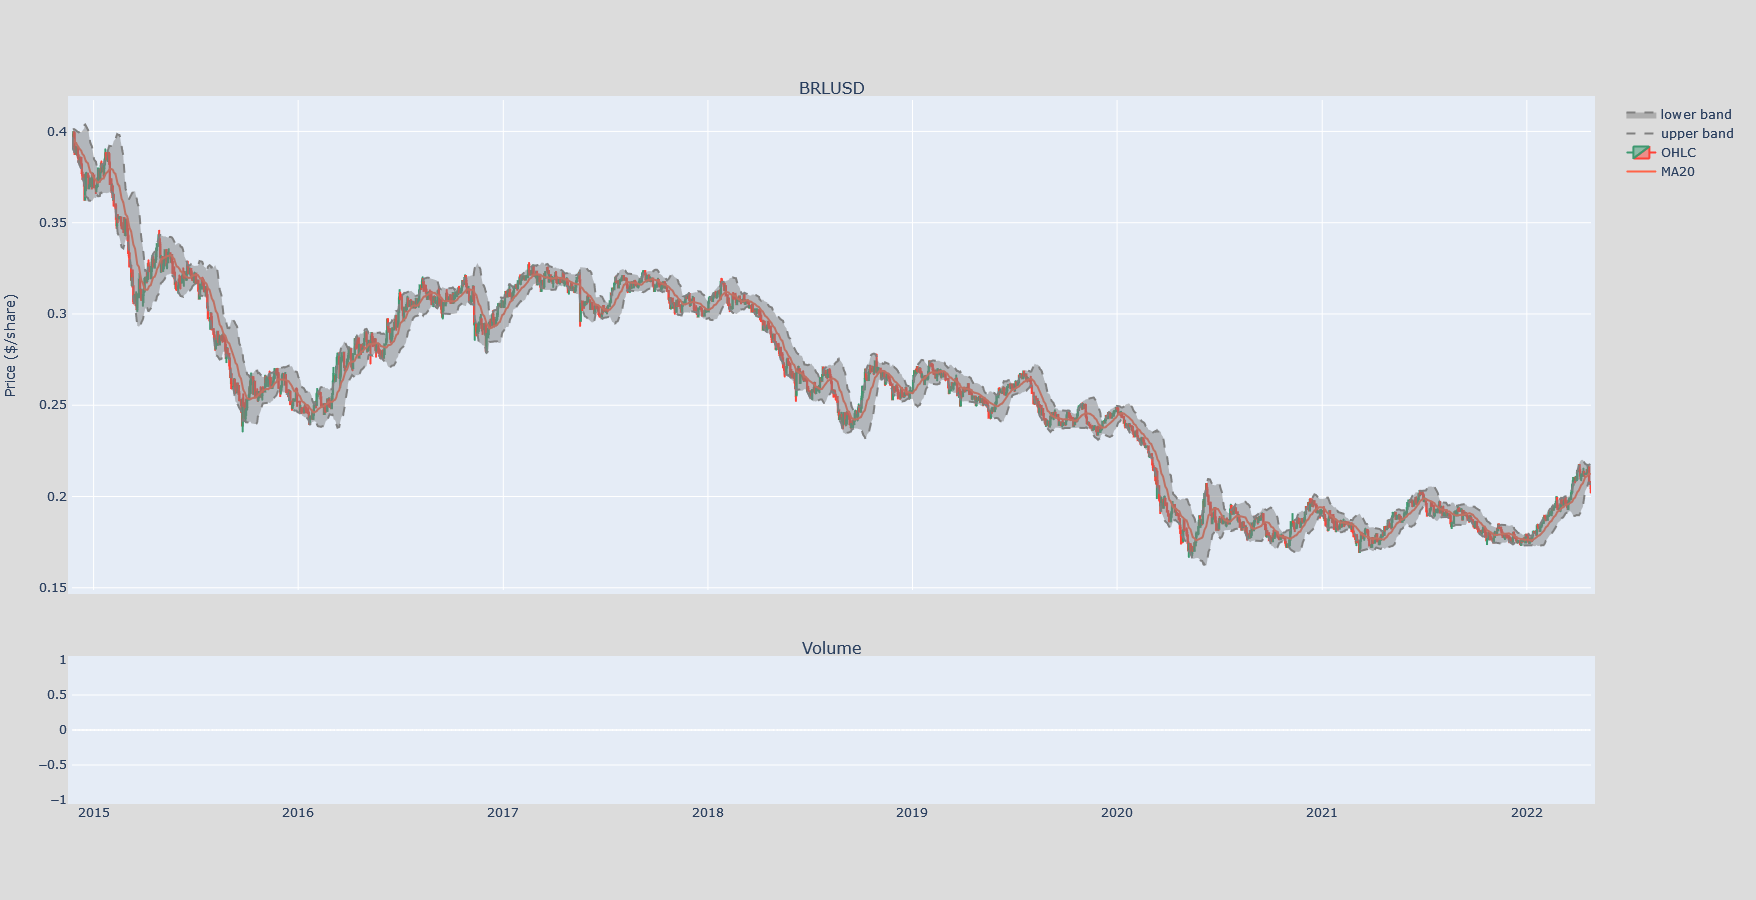

In [17]:
# Set moving Average and STD
forex['MA20'] = forex['close'].rolling(window=20, min_periods=0).mean()
forex['std'] = forex['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex.index, y=forex['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex.index, y=forex["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex.index, open=forex["open"], high=forex["high"],
                low=forex["low"], close=forex["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] + (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] - (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='gainsboro'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

### Plot The Second Countries Currency On A Candlestick Chart Verse The US Dollar

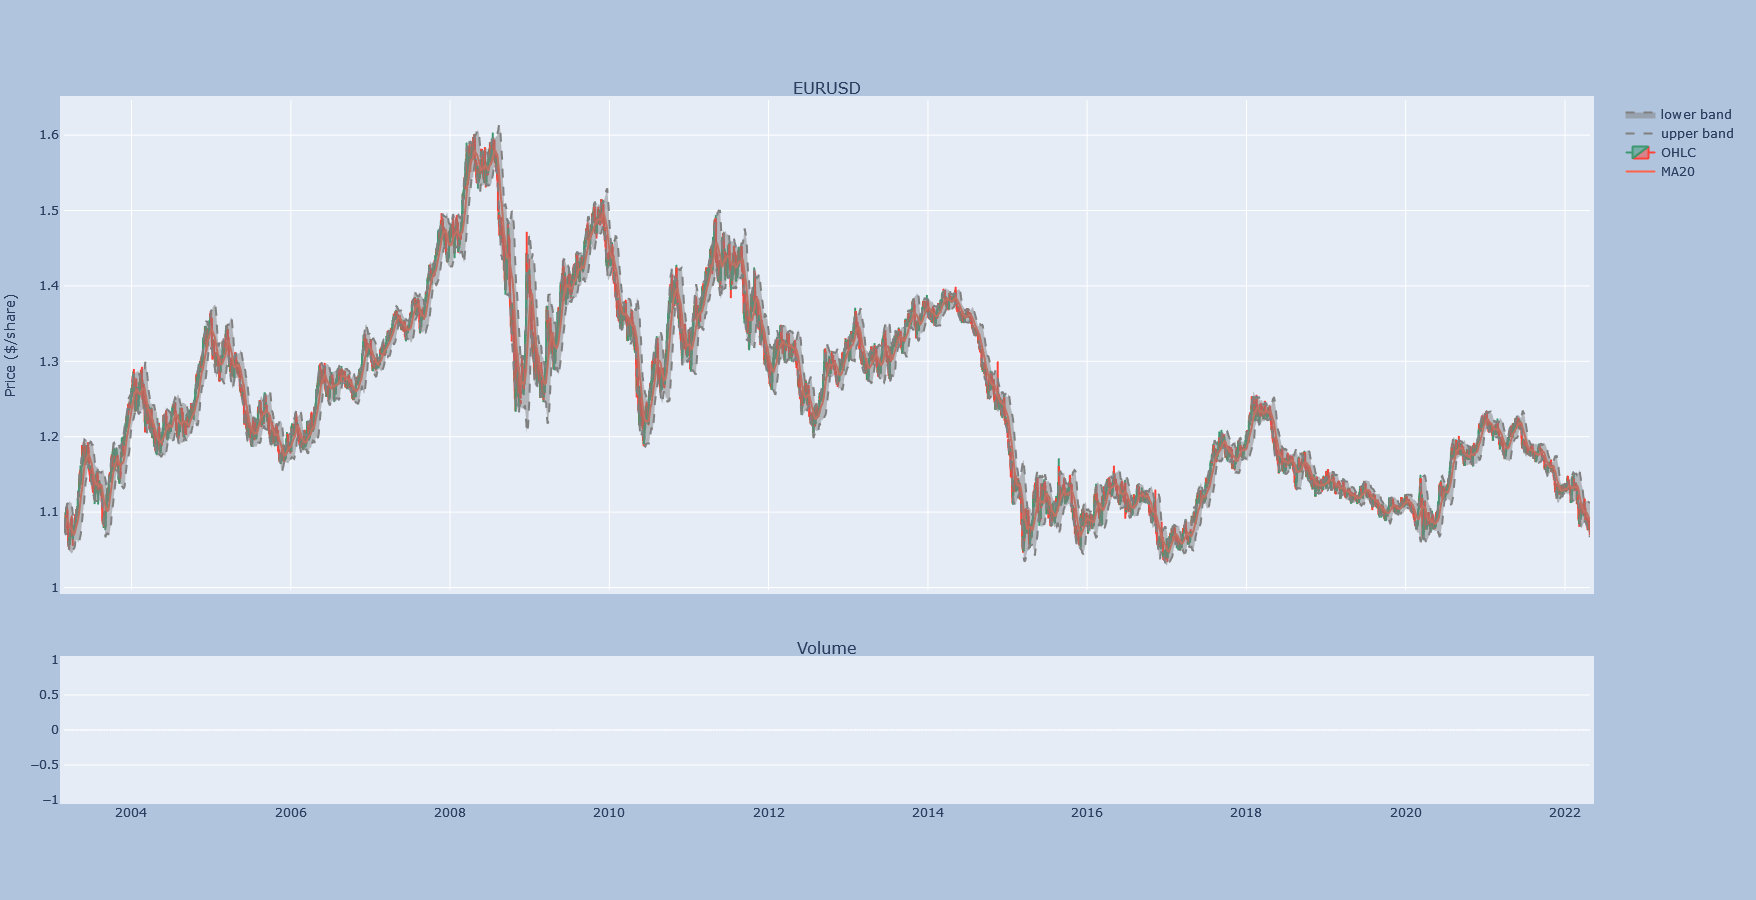

In [18]:
# Country Currency 2

# Set moving Average and STD
forex_2['MA20'] = forex_2['close'].rolling(window=20, min_periods=0).mean()
forex_2['std'] = forex_2['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_2, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex_2.index, y=forex_2['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex_2.index, y=forex_2["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex_2.index, open=forex_2["open"], high=forex_2["high"],
                low=forex_2["low"], close=forex_2["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex_2.index, 
                         y=forex_2["MA20"] + (forex_2['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex_2.index, 
                         y=forex_2["MA20"] - (forex_2['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()



### Plot The Third Countries Currency On A Candlestick Chart Verse The US Dollar

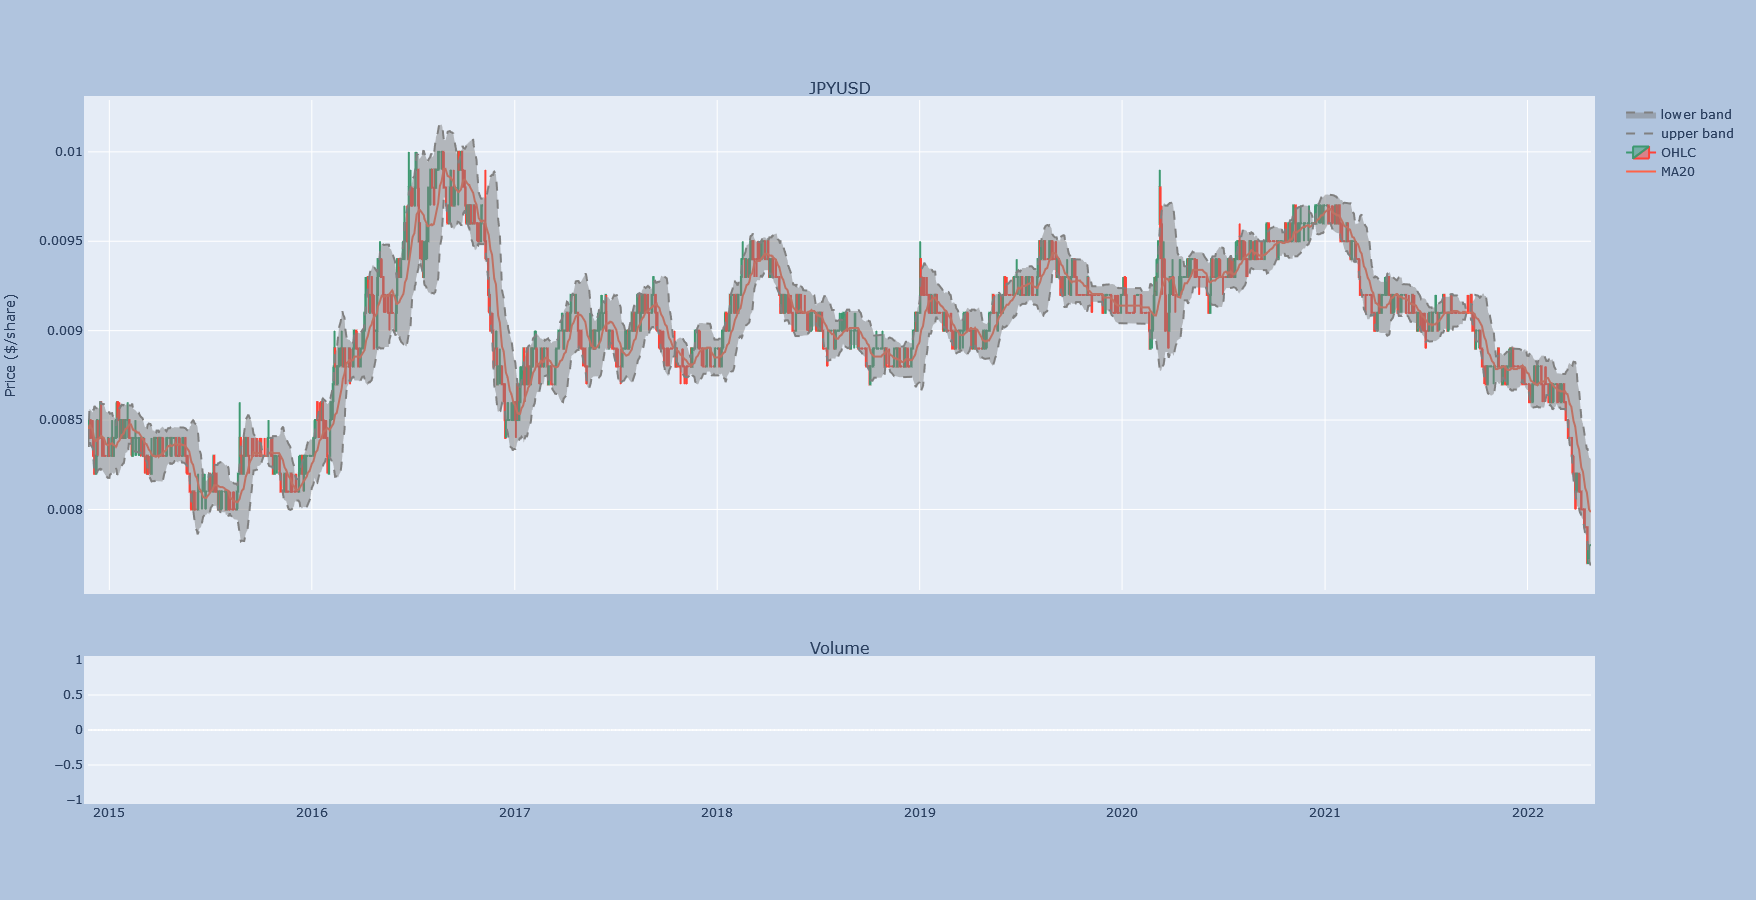

In [19]:
# Country Currency 3

# Set moving Average and STD
forex_3['MA20'] = forex_3['close'].rolling(window=20, min_periods=0).mean()
forex_3['std'] = forex_3['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_3, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex_3.index, y=forex_3['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex_3.index, y=forex_3["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex_3.index, open=forex_3["open"], high=forex_3["high"],
                low=forex_3["low"], close=forex_3["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex_3.index, 
                         y=forex_3["MA20"] + (forex_3['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex_3.index, 
                         y=forex_3["MA20"] - (forex_3['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

# Foreign Exchange Currency Converter

In [20]:
# Only input the amount of currency to be converted. 

currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
from_currency, to_currency = "USD", pair.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  1000


USD To BRL 1000
Conversion Amount:  4834.6361436813695


In [21]:
# Country 2 currency conversion

currency, amount = CurrencyRates(), amount
from_currency, to_currency = "USD", pair_2.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

USD To EUR 1000
Conversion Amount:  930.5788200260562


In [22]:
# country 3 currency conversion

currency, amount = CurrencyRates(), amount
from_currency, to_currency = "USD", pair_3.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

USD To JPY 1000
Conversion Amount:  128168.62088218871


# Monte Carlo Simulation on the returns of your inputed currency

### Plot the Simulated Outcomes for the inputed amount of days trajectory for the currency of country 1


### Country Currency 1 Monte Carlo 

In [23]:
time_series = pdr.av.time_series.AVTimeSeriesReader(f'{forex_pair}', api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
ticker_data = pd.concat([forex], axis=1, keys=[f'{forex_pair}'])
number_of_months = int(input("Input Number Of Months"))

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 50,
    num_trading_days = 21 * number_of_months
)

Input Number Of Months 12


In [24]:
# Run Monte Carlo simulations to forecast one year daily returns
forex_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.998876  0.992578  0.990609  1.000542  0.993743  0.996397  1.014497   
2    0.997661  1.019276  0.986016  0.986930  0.972331  0.985456  1.010217   
3    0.988916  1.031441  0.982479  0.988053  0.963719  0.995439  0.999458   
4    0.977313  1.042749  0.973938  0.976422  0.968432  1.006021  0.976380   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.966360  1.051508  0.755419  0.916252  1.037596  0.755643  1.008682   
249  0.983676  1.070077  0.743992  0.922050  1.049848  0.751676  0.987664   
250  0.970977  1.072622  0.740997  0.910783  1.049870  0.742982  1.015127   
251  0.985157  1.076382  0.737294  0.895963  1.047371  0.749998  1.005965   
252  0.985455  1.090349  0.732600  0.888789  1.083432  0.753484  0.997858   

           7         8         9   ...        40        41        42  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.988837  1.007928  1.010909  ...  0.992243  1.005722  0.996629   
2    0.988521  1.015423  1.003889  ...  0.989332  1.004062  1.015163   
3    0.984426  0.998100  0.994122  ...  0.977839  0.995492  1.028907   
4    0.978198  0.994713  1.000560  ...  0.983444  1.015423  1.034638   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.780692  0.930213  1.216192  ...  1.083151  0.837458  1.046670   
249  0.782967  0.928568  1.223075  ...  1.071459  0.834931  1.049823   
250  0.783645  0.915684  1.217547  ...  1.069201  0.836314  1.051419   
251  0.782234  0.919743  1.215427  ...  1.069403  0.839218  1.040181   
252  0.790268  0.892918  1.221582  ...  1.061413  0.835372  1.039451   

           43        44        45        46        47        48        49  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.984566  1.001007  1.007963  1.006526  1.003551  1.018006  1.009951  
2    0.982432  0.999679  1.012411  1.008323  0.995906  1.013850  1.008768  
3    0.990391  0.988964  1.032359  1.014192  0.980581  1.020130  0.994498  
4    0.988202  0.997132  1.041038  1.021150  0.981992  1.024561  1.019820  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.968922  0.920310  0.914335  0.949346  0.766832  0.900672  1.128049  
249  0.975585  0.934745  0.915231  0.953720  0.767483  0.908779  1.135626  
250  0.974065  0.944322  0.917983  0.954170  0.787443  0.926345  1.124141  
251  0.964536  0.951080  0.923967  0.947293  0.780171  0.937082  1.131649  
252  0.984864  0.942948  0.927738  0.938722  0.767125  0.938187  1.126863  

[253 rows x 50 columns]

### Plot the Simulated Outcomes for the inputed amount of time

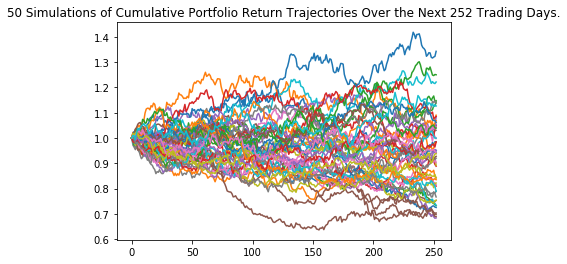

In [25]:
# Plot simulation outcomes
pd.options.plotting.backend = 'matplotlib'
line_plot = forex_montecarlo.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for inputted countries currency over the Next Year (252 Trading Days)

In [26]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.001146  1.001597  0.971636  1.022247
2  0.997046  0.996783  0.963633  1.025452
3  0.996488  0.994008  0.954195  1.036046
4  0.997696  0.998353  0.958801  1.042749

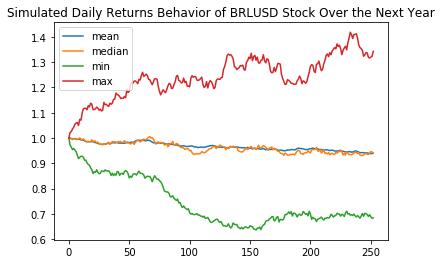

In [27]:
# Use the `plot` function to visually analyze the trajectory of first countries currency returns on a 252 trading day simulation
df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Stock Over the Next Year");

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [28]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample dat
cumulative_pnl.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1  1001.146037  1001.597426   971.636203  1022.247483
2   997.045775   996.783090   963.632755  1025.452035
3   996.488174   994.008047   954.195373  1036.045700
4   997.696045   998.352759   958.801137  1042.748877

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

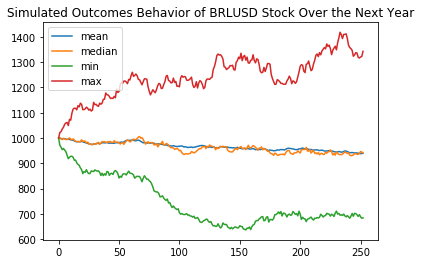

In [29]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Stock Over the Next Year")

### Calculate the range of the possible outcomes of our inputted amount in first countries currency

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = forex_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           50.000000
mean             0.939383
std              0.160351
min              0.684298
25%              0.811052
50%              0.940835
75%              1.052929
max              1.342856
95% CI Lower     0.691758
95% CI Upper     1.243768
Name: 252, dtype: float64


In [31]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower = round(tbl[8]*amount,2)
ci_upper = round(tbl[9]*amount,2)

# Print results
print(f"There is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of "
      f" ${ci_lower} and ${ci_upper},"
      f" by the time of your projected vacation.")

There is a 95% chance that your travel budget of $1000 will end within the range of  $691.76 and $1243.77, by the time of your projected vacation.


## Second Countries Currency - Monte Carlo

In [32]:
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(f'{forex_pair_2}', api_key='alpha_vantage_api_key')
forex_2 = time_series.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
ticker_data_2 = pd.concat([forex_2], axis=1, keys=[f'{forex_pair_2}'])
number_of_months = number_of_months

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = 50,
    num_trading_days = 21 * number_of_months
)

In [33]:
# Run Monte Carlo simulations to forecast one year daily returns
forex_2_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.995715  1.002734  1.012157  1.008976  1.005287  0.982041  1.015105   
2    0.999276  1.002105  1.018297  1.011796  1.006741  0.975622  1.000924   
3    0.997017  0.993261  1.032229  1.017584  1.010718  0.965904  0.991529   
4    0.984632  0.999437  1.047615  1.007236  0.990370  0.967703  0.976365   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.979610  1.056746  1.074922  1.130654  0.799084  0.626569  0.831714   
249  0.976787  1.061269  1.091636  1.128203  0.783701  0.630652  0.830396   
250  0.980723  1.059983  1.100450  1.118803  0.782707  0.625052  0.832167   
251  0.960646  1.073517  1.092616  1.126744  0.771953  0.631629  0.828793   
252  0.966641  1.064515  1.097877  1.129224  0.767237  0.630156  0.827877   

           7         8         9   ...        40        41        42  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.995061  0.994972  0.995558  ...  1.008471  1.010850  0.999991   
2    1.008929  0.972552  1.005672  ...  1.012121  1.010653  0.978952   
3    1.007479  0.977974  1.010128  ...  0.995910  1.023721  0.989759   
4    1.014881  0.975509  1.021789  ...  0.999610  1.000196  0.976030   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.036747  0.719814  0.763554  ...  0.821483  0.774641  0.832297   
249  1.022837  0.719016  0.763140  ...  0.810336  0.778961  0.835334   
250  1.024079  0.707467  0.769837  ...  0.813985  0.772896  0.837215   
251  1.002422  0.704368  0.763562  ...  0.808544  0.772191  0.827299   
252  0.998511  0.697208  0.766695  ...  0.796457  0.762840  0.826782   

           43        44        45        46        47        48        49  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.001110  0.997037  0.995566  1.001851  0.998609  1.000236  0.998289  
2    1.024388  1.016067  0.985252  1.000053  0.985317  0.984108  1.013910  
3    1.042535  1.010942  0.974119  1.010040  0.990525  1.006411  1.018048  
4    1.039045  1.018053  0.992602  1.041958  0.975234  0.997835  1.044075  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.888854  1.166862  0.965301  0.730249  1.309262  0.927558  1.273632  
249  0.879177  1.162448  0.980034  0.738211  1.300531  0.933523  1.254320  
250  0.887521  1.163778  0.989634  0.713751  1.298971  0.921998  1.267694  
251  0.886544  1.182912  0.992603  0.707254  1.284765  0.920216  1.242137  
252  0.876324  1.191021  0.998619  0.705986  1.274887  0.916739  1.240770  

[253 rows x 50 columns]

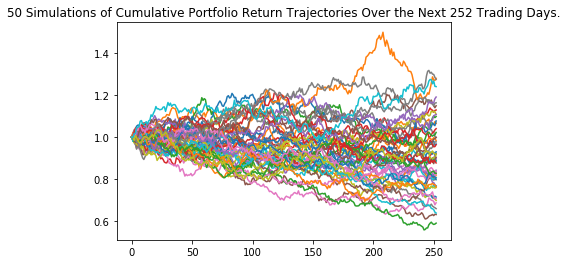

In [34]:
# Plot simulation outcomes
pd.options.plotting.backend = 'matplotlib'
line_plot_2 = forex_2_montecarlo.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for the second countries currency

In [35]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data_2 = {
    "mean": list(forex_2_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_2_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_2_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_2_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)

# Display sample data
df_simulated_returns_2.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  0.998450  0.998290  0.979899  1.020970
2  0.998639  0.998163  0.972552  1.034777
3  0.998943  0.998573  0.964422  1.042535
4  0.995589  0.992854  0.942299  1.051714

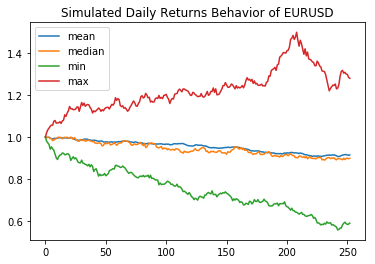

In [36]:
# Use the `plot` function to visually analyze the trajectory of first countries currency returns on a 252 trading day simulation
df_simulated_returns_2.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_2}");

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [37]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl_2 = initial_investment * df_simulated_returns_2

# Display sample dat
cumulative_pnl_2.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1   998.450205   998.289569   979.899081  1020.970260
2   998.639278   998.162740   972.552074  1034.776786
3   998.942582   998.572598   964.422061  1042.535122
4   995.589141   992.854441   942.298831  1051.713735

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

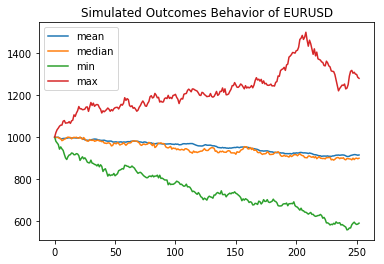

In [38]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl_2.plot(title=f"Simulated Outcomes Behavior of {forex_pair_2}")

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2 = forex_2_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl_2)

count           50.000000
mean             0.914524
std              0.175561
min              0.589167
25%              0.798896
50%              0.899003
75%              1.035512
max              1.280320
95% CI Lower     0.631744
95% CI Upper     1.267211
Name: 252, dtype: float64


In [40]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower_2 = round(tbl_2[8]*amount,2)
ci_upper_2 = round(tbl_2[9]*amount,2)

# Print results
print(f"There is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of "
      f" ${ci_lower_2} and ${ci_upper_2},"
      f" by the time of your projected vacation.")

There is a 95% chance that your travel budget of $1000 will end within the range of  $631.74 and $1267.21, by the time of your projected vacation.


## Third Countries Currency - Monte Carlo

In [41]:
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(f'{forex_pair_3}', api_key='alpha_vantage_api_key')
forex_3 = time_series.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
ticker_data_3 = pd.concat([forex_3], axis=1, keys=[f'{forex_pair_3}'])
number_of_months = number_of_months

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = 50,
    num_trading_days = 21 * number_of_months
)

In [42]:
# Run Monte Carlo simulations to forecast projected returns
forex_3_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.021488  1.004861  1.008376  0.977479  1.007651  0.998222  1.019352   
2    1.039302  1.003519  1.008758  0.989207  0.998046  1.016228  1.022262   
3    1.037051  1.005292  1.025183  0.999102  0.997191  1.008745  1.024396   
4    1.008510  1.018624  1.040375  0.994634  0.984961  1.006621  1.019419   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.639073  0.933201  0.746455  0.714551  0.814381  1.132381  1.236840   
249  0.642268  0.949596  0.760450  0.703719  0.818887  1.127832  1.234663   
250  0.630582  0.955571  0.744376  0.710692  0.818135  1.137641  1.241746   
251  0.628139  0.965140  0.750745  0.710661  0.825041  1.139751  1.247446   
252  0.636939  0.965423  0.756743  0.710707  0.823176  1.151700  1.232745   

           7         8         9   ...        40        41        42  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.993284  0.994993  0.999194  ...  1.007505  0.981104  1.014762   
2    1.003931  0.995098  1.008688  ...  1.006487  0.971668  1.021801   
3    0.998784  0.998745  1.000420  ...  0.992499  0.982792  1.029863   
4    0.995631  0.988740  0.980805  ...  0.988379  0.994572  1.014426   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.817864  0.970677  0.935674  ...  0.869774  0.701140  0.972462   
249  0.824410  0.965503  0.935705  ...  0.868681  0.701122  0.971748   
250  0.829257  0.974554  0.924897  ...  0.874457  0.705282  0.957374   
251  0.831632  0.974301  0.931635  ...  0.878134  0.706871  0.948251   
252  0.849008  0.982362  0.910383  ...  0.877821  0.700472  0.942246   

           43        44        45        46        47        48        49  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.993584  1.002028  0.982710  1.004414  0.999527  1.000349  0.983269  
2    0.995716  0.990155  0.980519  1.012655  1.014899  0.994654  0.988333  
3    1.011098  0.979066  0.981228  1.015806  1.011513  0.981277  0.986016  
4    1.014639  0.967400  0.988618  1.040603  1.017980  0.967666  0.988080  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.281797  0.917499  1.065273  1.045132  1.141881  1.047577  0.674322  
249  1.287533  0.908970  1.046408  1.034939  1.140889  1.053553  0.672544  
250  1.271950  0.916078  1.039500  1.023134  1.136894  1.046396  0.668036  
251  1.281285  0.923812  1.044636  1.029768  1.133309  1.071476  0.673797  
252  1.289996  0.943466  1.042325  1.019489  1.125062  1.068818  0.666868  

[253 rows x 50 columns]

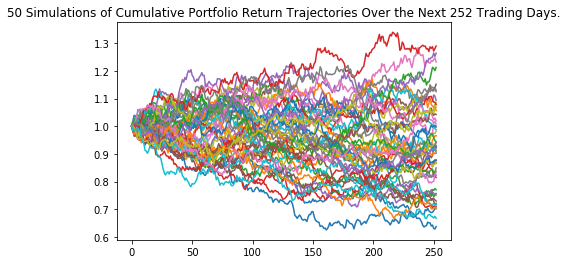

In [43]:
# Plot simulation outcomes
pd.options.plotting.backend = 'matplotlib'
line_plot_3 = forex_3_montecarlo.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for the second countries currency

In [44]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data_3 = {
    "mean": list(forex_3_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_3_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_3_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_3_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)

# Display sample data
df_simulated_returns_3.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  0.999163  0.998760  0.977479  1.021488
2  1.000082  1.000631  0.963862  1.039302
3  1.000892  1.003348  0.964087  1.037051
4  0.998536  0.996949  0.965038  1.040603

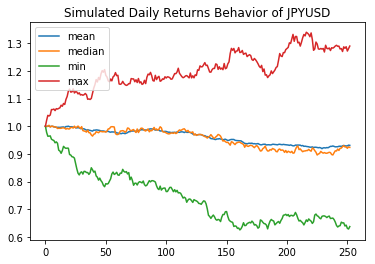

In [45]:
# Use the `plot` function to visually analyze the trajectory of third countries currency returns on a simulation
df_simulated_returns_3.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_3}");

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [46]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl_3 = initial_investment * df_simulated_returns_3

# Display sample data
cumulative_pnl_3.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1   999.163251   998.759926   977.478557  1021.487704
2  1000.082050  1000.630882   963.861830  1039.302387
3  1000.891550  1003.348312   964.087367  1037.050745
4   998.536099   996.948738   965.037614  1040.602868

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

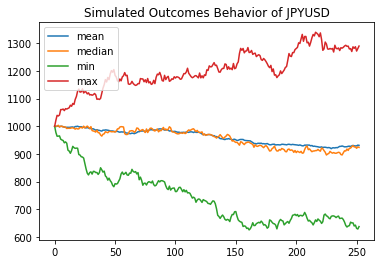

In [47]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl_3.plot(title=f"Simulated Outcomes Behavior of {forex_pair_3}");

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3 = forex_3_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl_3)

count           50.000000
mean             0.930780
std              0.161702
min              0.636939
25%              0.826047
50%              0.923511
75%              1.036616
max              1.289996
95% CI Lower     0.674429
95% CI Upper     1.257152
Name: 252, dtype: float64


In [49]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower_3 = round(tbl_3[8]*amount,2)
ci_upper_3 = round(tbl_3[9]*amount,2)

# Print results
print(f"There is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of "
      f" ${ci_lower_3} and ${ci_upper_3},"
      f" by the time of your projected vacation.")

There is a 95% chance that your travel budget of $1000 will end within the range of  $674.43 and $1257.15, by the time of your projected vacation.


In [50]:
print(f"Comparing all 3 desired countries currencies,"
      f" there is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of: " "\n"
      f" ${ci_lower} and ${ci_upper} for {forex_pair}," "\n"
      f" ${ci_lower_2} and ${ci_upper_2} for {forex_pair_2}," "\n"
      f" ${ci_lower_3} and ${ci_upper_3} for {forex_pair_3}," "\n"
      f" by the time of your projected vacation.")

Comparing all 3 desired countries currencies, there is a 95% chance that your travel budget of $1000 will end within the range of: 
 $691.76 and $1243.77 for BRLUSD,
 $631.74 and $1267.21 for EURUSD,
 $674.43 and $1257.15 for JPYUSD,
 by the time of your projected vacation.


# Beta

### Introduce US dollar as benchmark and clean data

In [51]:
# Import US Dollar Index
yahoo_financials = YahooFinancials('DX-Y.NYB')

# Read in US dollar index
read_us_dollar = YahooFinancials('DX-Y.NYB')

# Get US Dollars Historical Price data

# Dict of Dicts 
us_dollar = read_us_dollar.get_historical_price_data('2010-04-23', '2022-04-23', 'daily')

#Parse the data and isolate 'Prices' from the dictionary
us_dollar_price = us_dollar["DX-Y.NYB"]["prices"]

#Create df
us_dollar_df = pd.DataFrame(us_dollar_price)
us_dollar_df

date        high         low        open       close  volume  \
0     1271995200   82.099998   81.320000   82.019997   81.349998     0.0   
1     1272168000         NaN         NaN         NaN         NaN     NaN   
2     1272254400   81.709999   81.169998   81.470001   81.480003     0.0   
3     1272340800   82.440002   81.169998   81.180000   82.150002     0.0   
4     1272427200   82.709999   82.019997   82.290001   82.379997     0.0   
...          ...         ...         ...         ...         ...     ...   
3645  1650254400  100.860001  100.459999  100.500000  100.779999     0.0   
3646  1650340800  101.029999  100.699997  100.830002  100.959999     0.0   
3647  1650427200  101.040001  100.220001  100.980003  100.389999     0.0   
3648  1650513600  100.639999   99.820000  100.349998  100.580002     0.0   
3649  1650600000  101.330002  100.470001  100.620003  101.220001     0.0   

        adjclose formatted_date  
0      81.349998     2010-04-23  
1            NaN     2010-04-25  
2      81.480003     2010-04-26  
3      82.150002     2010-04-27  
4      82.379997     2010-04-28  
...          ...            ...  
3645  100.779999     2022-04-18  
3646  100.959999     2022-04-19  
3647  100.389999     2022-04-20  
3648  100.580002     2022-04-21  
3649  101.220001     2022-04-22  

[3650 rows x 8 columns]

In [52]:
# Set the date as the index to the DataFrame
us_dollar_df.set_index(pd.to_datetime(us_dollar_df['formatted_date'], infer_datetime_format=True), inplace=True)

# Drop un needed columns 
us_dollar_df.drop(columns=['date', 'open', 'high', 'low', 'volume', 'adjclose', 'formatted_date'], inplace=True)

# Rename index and column 
#us_dollar_df.rename(index={'formatted_date': 'Date'}, columns={'close': 'Close'})

# Count nulls
us_dollar_df.isnull().sum()

# Drop nulls
us_dollar_df = us_dollar_df.dropna()

us_dollar_df.head()

close
formatted_date           
2010-04-23      81.349998
2010-04-26      81.480003
2010-04-27      82.150002
2010-04-28      82.379997
2010-04-29      82.000000

In [53]:
# Calculate Daily Returns

us_dollar_daily_returns = us_dollar_df.pct_change().dropna()
us_dollar_daily_returns

close
formatted_date          
2010-04-26      0.001598
2010-04-27      0.008223
2010-04-28      0.002800
2010-04-29     -0.004613
2010-04-30     -0.001585
...                  ...
2022-04-18      0.004585
2022-04-19      0.001786
2022-04-20     -0.005646
2022-04-21      0.001893
2022-04-22      0.006363

[3020 rows x 1 columns]

# Calculate Daily Returns

In [54]:
# Calculate Daily Returns four country 1

forex_daily_returns = forex_close.pct_change().dropna()
forex_daily_returns

close
2014-11-25  0.008929
2014-11-26  0.010114
2014-11-27 -0.012015
2014-11-28 -0.014188
2014-12-01  0.005654
...              ...
2022-04-19 -0.003265
2022-04-20  0.010763
2022-04-21  0.000000
2022-04-22 -0.037500
2022-04-25 -0.014430

[1934 rows x 1 columns]

In [55]:
# Calculate Daily Returns four country 2

forex_2_daily_returns = forex_2_close.pct_change().dropna()
forex_2_daily_returns

close
2003-02-27 -0.002039
2003-02-28  0.003158
2003-03-03  0.007684
2003-03-04 -0.000827
2003-03-05  0.008920
...              ...
2022-04-19  0.000928
2022-04-20  0.005840
2022-04-21 -0.001475
2022-04-22 -0.003784
2022-04-25 -0.007597

[4998 rows x 1 columns]

In [56]:
# Calculate Daily Returns four country 3

forex_3_daily_returns = forex_3_close.pct_change().dropna()
forex_3_daily_returns

close
2014-11-25  0.011905
2014-11-26  0.000000
2014-11-27  0.000000
2014-11-28 -0.011765
2014-12-01  0.000000
...              ...
2022-04-19 -0.025316
2022-04-20  0.012987
2022-04-21  0.000000
2022-04-22  0.000000
2022-04-25  0.000000

[1935 rows x 1 columns]

In [57]:
joined_forex_daily_returns = joined_forex.pct_change().dropna()
joined_forex_daily_returns

BRLUSD    EURUSD    JPYUSD
               close     close     close
2014-11-25  0.008929  0.002814  0.011905
2014-11-26  0.010114  0.002726  0.000000
2014-11-27 -0.012015 -0.003918  0.000000
2014-11-28 -0.014188 -0.000562 -0.011765
2014-12-01  0.005654  0.001687  0.000000
...              ...       ...       ...
2022-04-19 -0.003265  0.000928 -0.025316
2022-04-20  0.010763  0.005840  0.012987
2022-04-21  0.000000 -0.001475  0.000000
2022-04-22 -0.037500 -0.003784  0.000000
2022-04-25 -0.014430 -0.007597  0.000000

[1934 rows x 3 columns]

In [58]:
# Concat Data and rename columns to reflect Daily returns

joined_data = pd.concat([joined_forex_daily_returns, us_dollar_daily_returns], axis='columns', join='inner')
joined_data.columns=[f'{forex_pair} Daily Returns',f'{forex_pair_2} Daily Returns', f'{forex_pair_3} Daily Returns', 'US Dollar Daily Returns']
joined_data

BRLUSD Daily Returns  EURUSD Daily Returns  JPYUSD Daily Returns  \
2014-11-25              0.008929              0.002814              0.011905   
2014-11-26              0.010114              0.002726              0.000000   
2014-11-28             -0.014188             -0.000562             -0.011765   
2014-12-01              0.005654              0.001687              0.000000   
2014-12-02             -0.008433             -0.007136              0.000000   
...                          ...                   ...                   ...   
2022-04-18              0.009416             -0.002499              0.000000   
2022-04-19             -0.003265              0.000928             -0.025316   
2022-04-20              0.010763              0.005840              0.012987   
2022-04-21              0.000000             -0.001475              0.000000   
2022-04-22             -0.037500             -0.003784              0.000000   

            US Dollar Daily Returns  
2014-11-25                -0.002609  
2014-11-26                -0.003526  
2014-11-28                 0.008561  
2014-12-01                -0.004640  
2014-12-02                 0.007959  
...                             ...  
2022-04-18                 0.004585  
2022-04-19                 0.001786  
2022-04-20                -0.005646  
2022-04-21                 0.001893  
2022-04-22                 0.006363  

[1863 rows x 4 columns]

# Performance Analysis

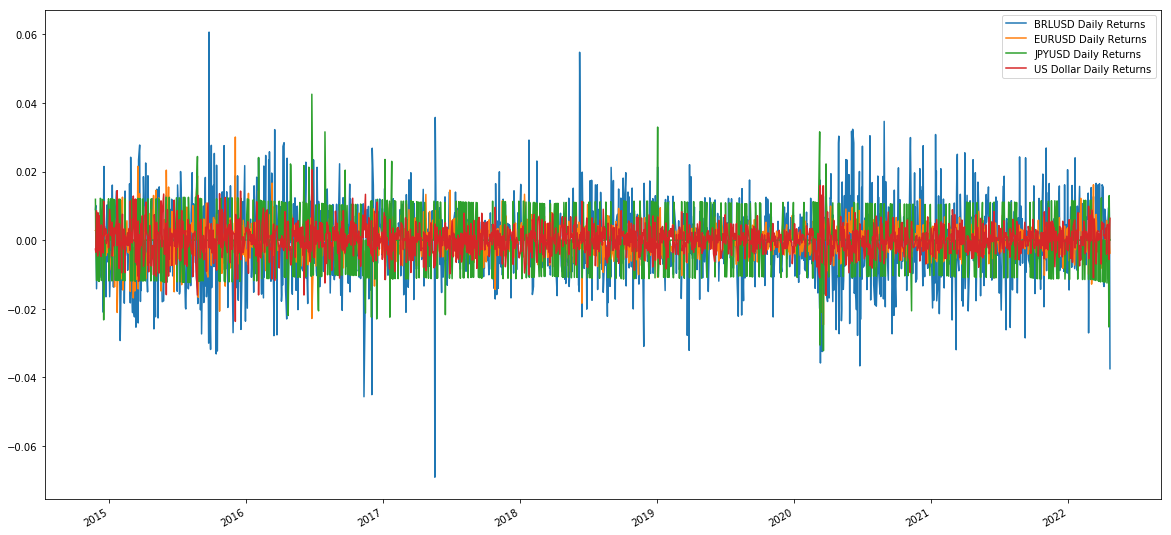

In [59]:
# Plot daily returns of all countries currencies

joined_data.plot(figsize=(20,10));

# Calculate and plot cumulative returns

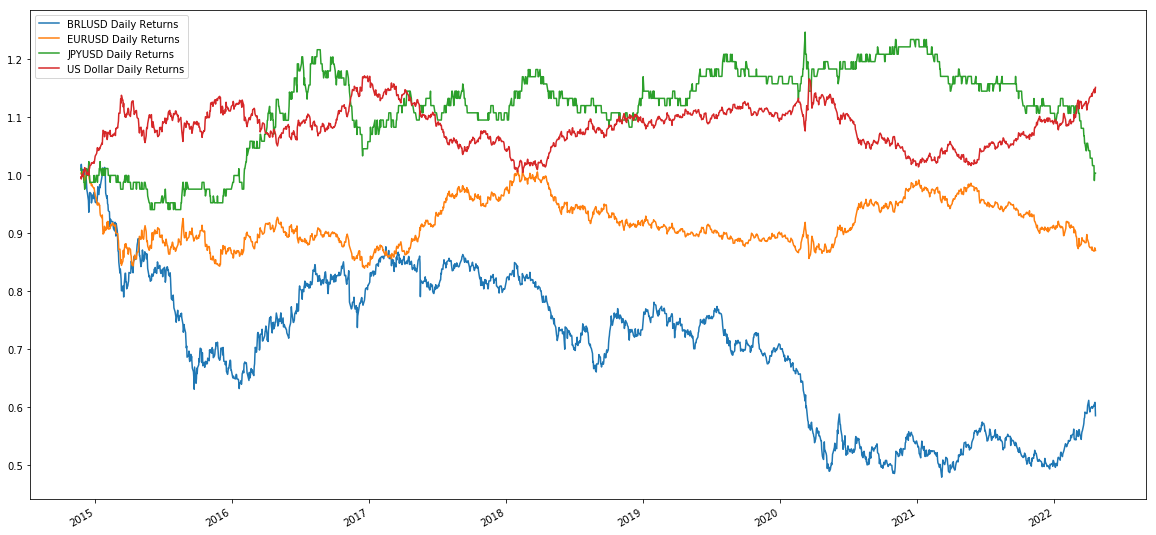

In [60]:
# Calculate cumulative returns of all countries currencies
cum_returns = (1+joined_data).cumprod()

# Plot cumulative returns
cum_returns.plot(figsize=(20,10));

### Create a box plot for each portfolio

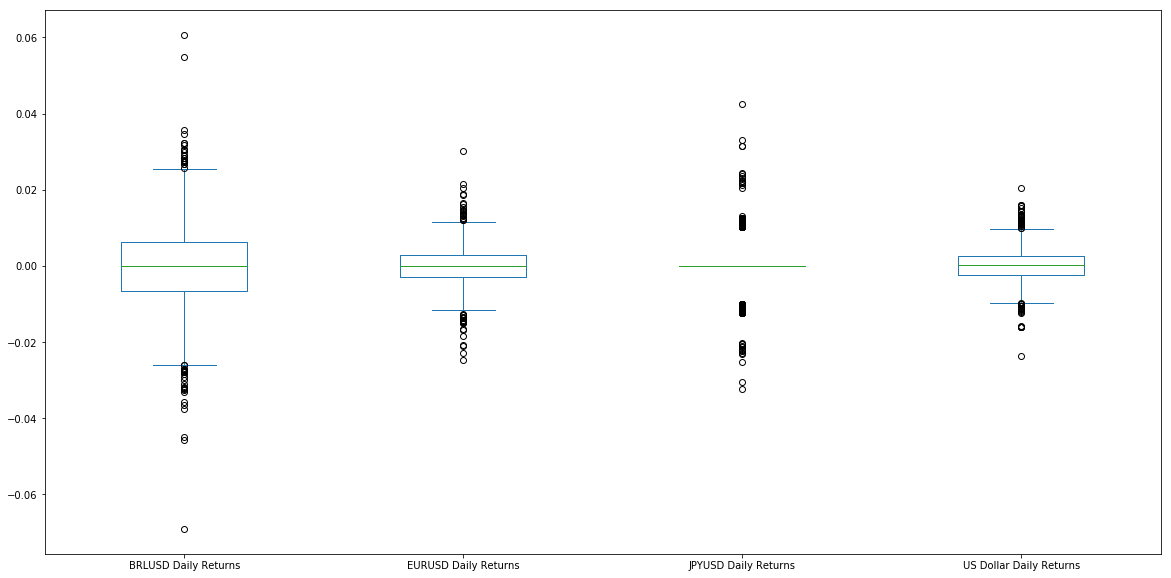

In [61]:
# Box plot to visually show risk

joined_data.plot.box(figsize=(20,10));

### Calculate Standard Deviations

In [62]:
# Calculate the daily standard deviations of all countreis currencies

joined_data_daily_returns_std = joined_data.std()
joined_data_daily_returns_std

BRLUSD Daily Returns       0.010834
EURUSD Daily Returns       0.004922
JPYUSD Daily Returns       0.006836
US Dollar Daily Returns    0.004215
dtype: float64

### Determine which country currencies are riskier than the US Dollar Index

In [63]:
# Calculate  the daily standard deviation of US Dollar
isolated_dollar = joined_data['US Dollar Daily Returns'].std()

In [64]:
# Determine which countries currencies are riskier than the US Dollar
joined_data_daily_returns_std > isolated_dollar

BRLUSD Daily Returns        True
EURUSD Daily Returns        True
JPYUSD Daily Returns        True
US Dollar Daily Returns    False
dtype: bool

### Calculate the Anualized Standard Deviation

In [65]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_data_daily_returns_std * np.sqrt(252)
annualized_std

BRLUSD Daily Returns       0.171992
EURUSD Daily Returns       0.078142
JPYUSD Daily Returns       0.108517
US Dollar Daily Returns    0.066910
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all countries currencies using a 21-day window
2. Calculate the correlation between each countries currency to determine which currencies may mimick the US Dollar
3. Choose one currency, then calculate and plot the 60-day rolling beta between it and the US Dollar

### Calculate and plot rolling std for all portfolios with 21-day window

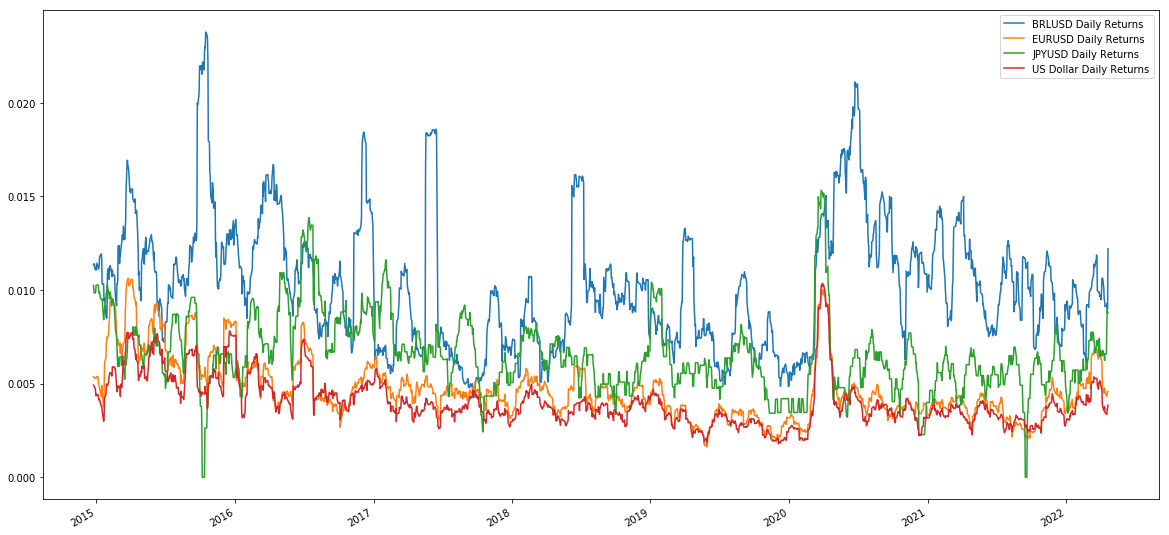

In [66]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_forex_21_day_std = joined_data.rolling(window = 21).std()

# Plot the rolling standard deviation
joined_forex_21_day_std.plot(figsize=(20, 10));

### Calculate and plot the correlation

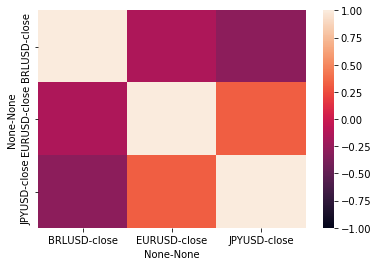

In [67]:
# Calculate the correlation
correlation = joined_forex.corr()

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1);

### Calculate and Plot Beta for a chosen countreis currency and the US Dollar

In [68]:
# Chosen Country 1

# Calculate covariance of a single country currency
covariance = (joined_data[f'{forex_pair} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
covariance

# Calculate variance of S&P 500
variance = joined_data['US Dollar Daily Returns'].var()
variance

# Computing beta
beta = covariance / variance
beta

-0.6064139325019574

In [69]:
# Chosen Country 2

# Calculate covariance of a single country currency
covariance_2 = (joined_data[f'{forex_pair_2} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
covariance_2

# Calculate variance of S&P 500
variance_2 = joined_data['US Dollar Daily Returns'].var()
variance_2

# Computing beta
beta_2 = covariance_2 / variance_2
beta_2

-1.0708649594040929

In [70]:
# Chosen Country 3

# Calculate covariance of a single country currency
covariance_3 = (joined_data[f'{forex_pair_3} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
covariance_3

# Calculate variance of S&P 500
variance_3 = joined_data['US Dollar Daily Returns'].var()
variance_3

# Computing beta
beta_3 = covariance / variance
beta_3

-0.6443920614216534

In [71]:
# Plot beta trend

sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair} Daily Returns", data = joined_forex, aspect = 1.5, fit_reg = True);

KeyError: "['BRLUSD Daily Returns' 'US Dollar Daily Returns'] not in index"

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [72]:
# Calculate Annualized Sharpe Ratios
combined_data_sharpe_ratios = (joined_forex_daily_returns.mean() * 252) / (joined_forex_daily_returns.std() * np.sqrt(252))
combined_data_sharpe_ratios


BRLUSD  close   -0.411356
EURUSD  close   -0.214046
JPYUSD  close   -0.035936
dtype: float64

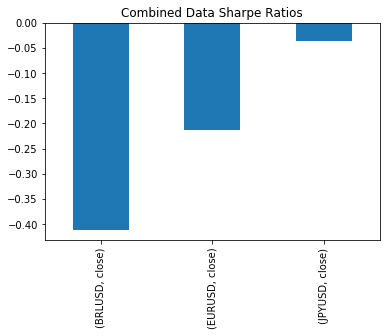

In [73]:
# Visualize the sharpe ratios as a bar plot
combined_data_sharpe_ratios.plot(kind="bar", title= "Combined Data Sharpe Ratios");

### What Countries Currency is the riskiest? 

# Build Map 

In [74]:
# Set Path and Read in csv data.

csvpath = Path("all_countries.csv")
country_list_df = pd.read_csv(csvpath)
#country_list_df

In [75]:
# Initialize lists to be turned into columns of dataframe
capital_city = []
lat_long = []
currency = []
subregion = []
wiki = []
lat = []
long = []

for country in country_list_df['Country']:
    country_data = CountryInfo(country)
    capital_city.append(country_data.capital())
    lat.append(country_data.capital_latlng()[0])
    long.append(country_data.capital_latlng()[1])
    currency.append(country_data.currencies())
    subregion.append(country_data.subregion())
    wiki.append(country_data.wiki()) 
    
# Build Dataframe

country_list_df['Capital City'] = capital_city
country_list_df['Latitude'] = lat
country_list_df['Longitude'] = long
country_list_df['Currency'] = currency
country_list_df['Sub-Region'] = subregion
country_list_df['wiki'] = wiki
country_list_df

Country Population\r\n(2020) Land Area\r\n (Km²)  \
0            Afghanistan           38,928,346             652,860   
1                Albania            2,877,797              27,400   
2                Algeria           43,851,044           2,381,740   
3                 Angola           32,866,272           1,246,700   
4    Antigua and Barbuda               97,929                 440   
..                   ...                  ...                 ...   
174            Venezuela           28,435,940             882,050   
175              Vietnam           97,338,579             310,070   
176                Yemen           29,825,964             527,970   
177               Zambia           18,383,955             743,390   
178             Zimbabwe           14,862,924             386,850   

    Density\r\n(P/Km²)  Capital City   Latitude   Longitude Currency  \
0                   60         Kabul  34.526011   69.177684    [AFN]   
1                  105        Tirana  41.326873   19.818791    [ALL]   
2                   18       Algiers  36.775361    3.060188    [DZD]   
3                   26        Luanda  -8.827270   13.243951    [AOA]   
4                  223  Saint John's  47.561701  -52.715149    [XCD]   
..                 ...           ...        ...         ...      ...   
174                 32       Caracas  10.506098  -66.914602    [VEF]   
175                314         Hanoi  21.029450  105.854444    [VND]   
176                 56        Sana'a  15.353857   44.205884    [YER]   
177                 25        Lusaka -15.416449   28.282154    [ZMK]   
178                 38        Harare -17.831773   31.045686    [USD]   

             Sub-Region                                              wiki  
0         Southern Asia          http://en.wikipedia.org/wiki/afghanistan  
1       Southern Europe              http://en.wikipedia.org/wiki/albania  
2       Northern Africa              http://en.wikipedia.org/wiki/algeria  
3         Middle Africa               http://en.wikipedia.org/wiki/angola  
4             Caribbean  http://en.wikipedia.org/wiki/antigua_and_barbuda  
..                  ...                                               ...  
174       South America            http://en.wikipedia.org/wiki/venezuela  
175  South-Eastern Asia              http://en.wikipedia.org/wiki/vietnam  
176        Western Asia                http://en.wikipedia.org/wiki/yemen  
177      Eastern Africa               http://en.wikipedia.org/wiki/zambia  
178      Eastern Africa             http://en.wikipedia.org/wiki/zimbabwe  

[179 rows x 10 columns]

### Plot the populated map

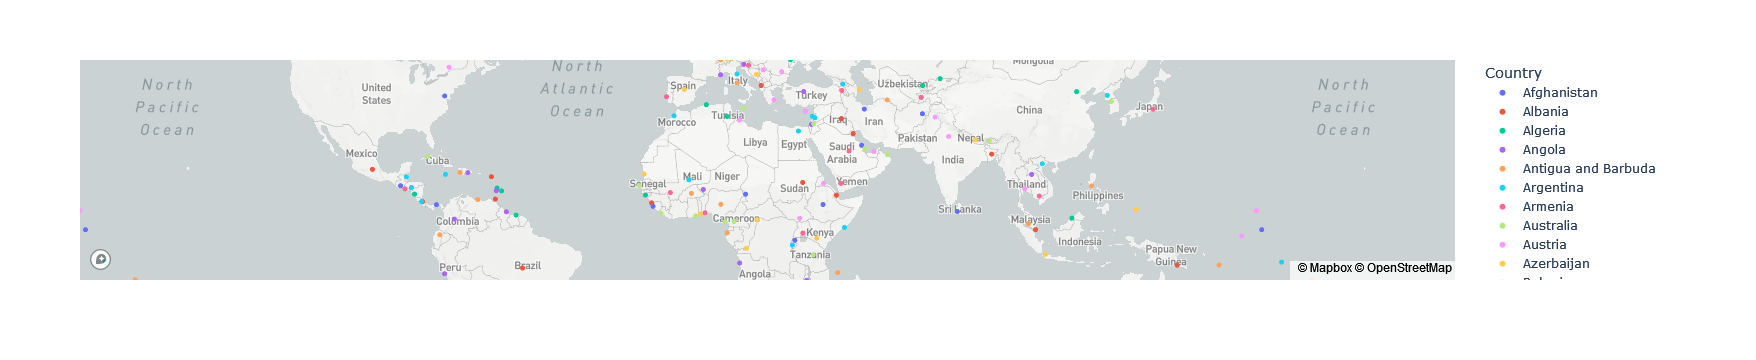

In [76]:
# Slice and plot data by name
map_1 = px.scatter_mapbox(
    country_list_df,
    lat='Latitude',
    lon='Longitude',
    color="Country",
    zoom=1.2
)
map_1.show()